In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA

from mpl_toolkits import mplot3d
plt.style.use('ggplot')

!pip install --upgrade openpyxl

!wget -O data_ecg.xlsx 'https://github.com/Shelby-Bilyeu/PCA/blob/44afb25015f49bc15aa0b1e41fbfc633102580be/ecg_data.xlsx?raw=true'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10
--2023-06-29 13:11:22--  https://github.com/Shelby-Bilyeu/PCA/blob/44afb25015f49bc15aa0b1e41fbfc633102580be/ecg_data.xlsx?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Shelby-Bilyeu/PCA/raw/44afb25015f49bc15aa0b1e41fbfc633102580be/ecg_data.xlsx [following]
--2023-06-29 13:11:22--  https://github.com/Shelby-Bilyeu/PCA/raw/44afb25015f49bc15aa0b1e41fbfc633102580be/ecg_data.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Shelby-Bilyeu/PCA/44afb25015f49bc15aa0b1e41fbfc633102580be/ecg_data.xlsx [f

<Axes: >

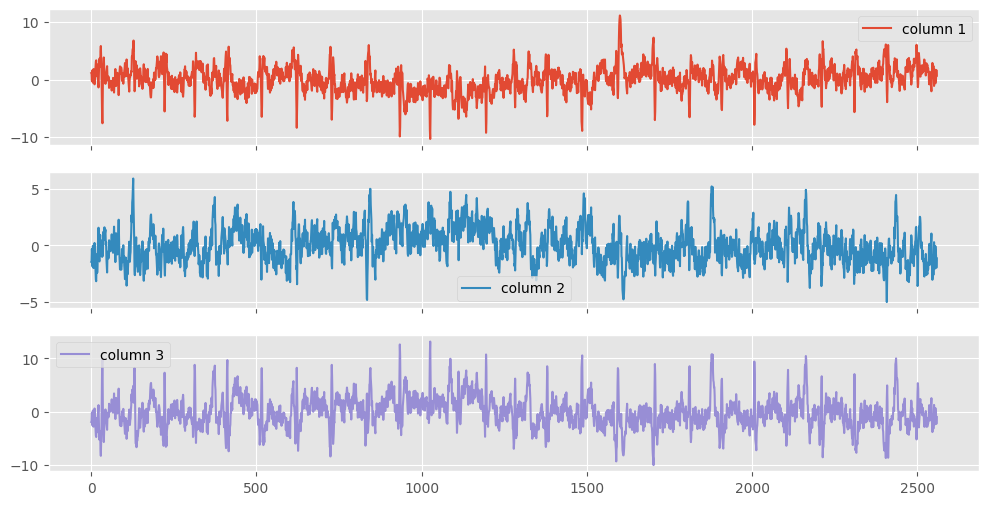

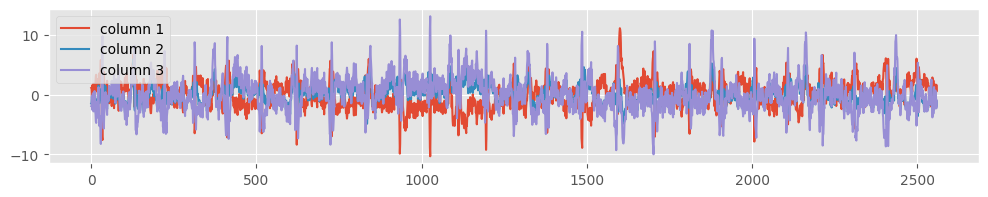

In [2]:
headers = ["column 1","column 2","column 3"]
df = pd.read_excel('data_ecg.xlsx', names=headers, header=None)
df.plot(subplots=True,figsize=(12,6))
df.plot(figsize=(12,2))

<Axes: >

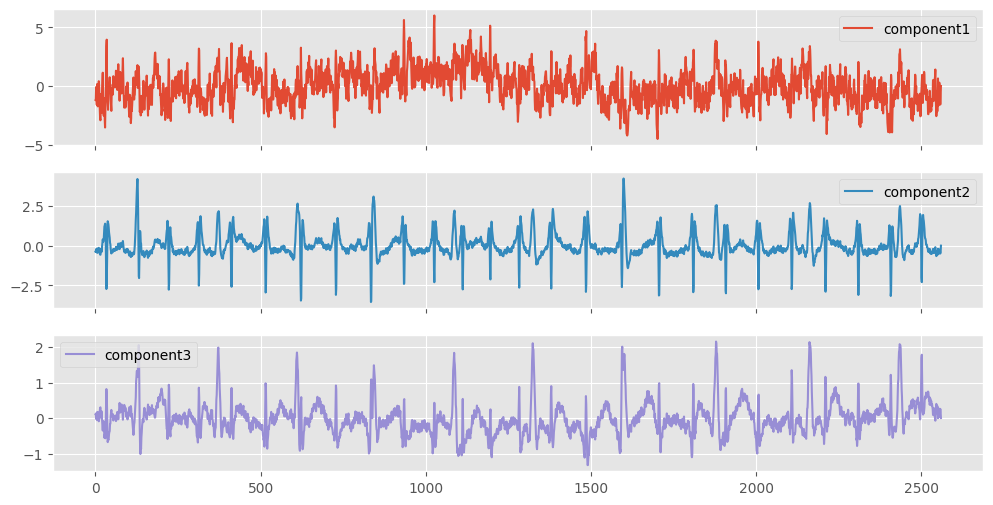

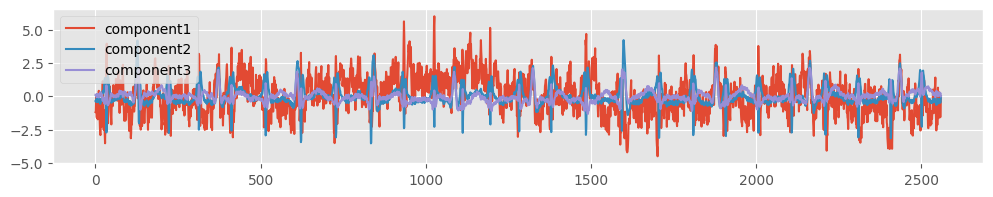

In [3]:
df.loc['column 3'] = 0
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
pcaData = pd.DataFrame(df_pca)
pcaData.columns = ["component1", "component2", "component3"]
pcaData.plot(subplots=True,figsize=(12,6))
pcaData.plot(figsize=(12,2))

# df.loc['column 3'] = 0
# df_pca = pca.fit_transform(df)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_pca)
# pcaData = pd.DataFrame(scaled_data)
# pcaData.plot(subplots=True,figsize=(12,6))
# pcaData.plot(figsize=(12,2))



In [4]:
pcaData.head()

,component1,component2,component3
0,-1.188445,-0.376313,0.107948
1,-1.123425,-0.365746,0.099682
2,-0.089334,-0.218427,-0.026915
3,-0.942606,-0.337439,0.077029
4,-1.602267,-0.429128,0.157337


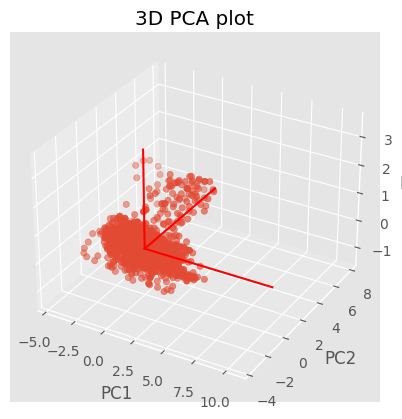

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xax = pcaData["component1"]
Yax = pcaData["component2"]
Zax = pcaData["component3"]

ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

ax.scatter(Xax, Yax, Zax)

origin = [0, 0, 0]  # Origin of the axes
axes_lengths = [max(Xax) - min(Xax), max(Yax) - min(Yax), max(Zax) - min(Zax)]  # Lengths of the axes
ax.plot([origin[0], origin[0] + axes_lengths[0]], [origin[1], origin[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1] + axes_lengths[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1]], [origin[2], origin[2] + axes_lengths[2]], 'r')

plt.title("3D PCA plot")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


<Axes: >

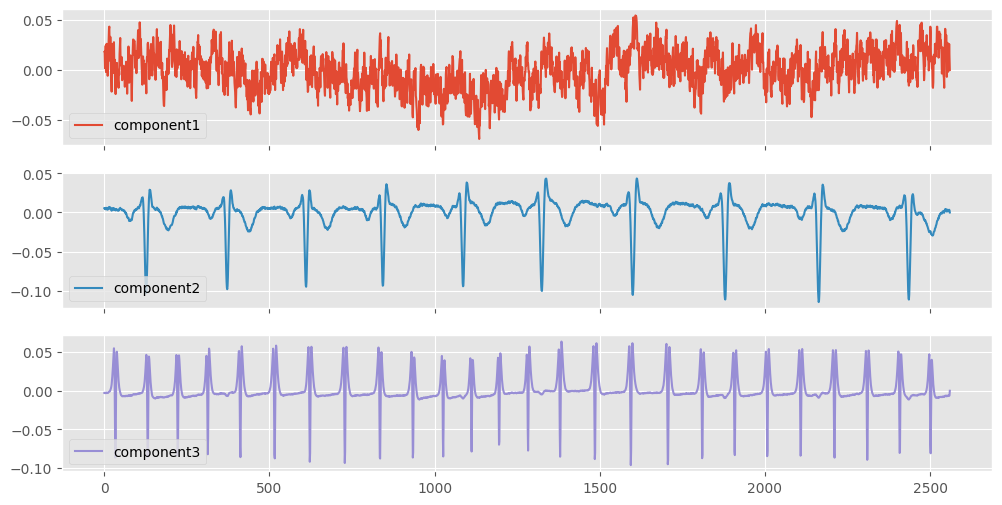

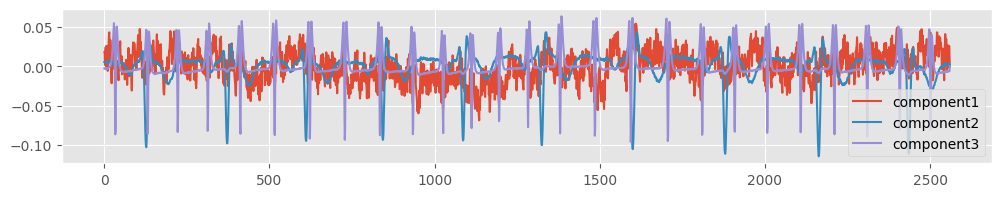

In [11]:
from sklearn.decomposition import FastICA
df.loc['column 3'] = 0
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

ica = FastICA(n_components=3)
icaData = ica.fit_transform(df_scaled)

icaData = pd.DataFrame(icaData, columns=["component1", "component2", "component3"])

icaData.plot(subplots=True, figsize=(12, 6))
icaData.plot(figsize=(12, 2))




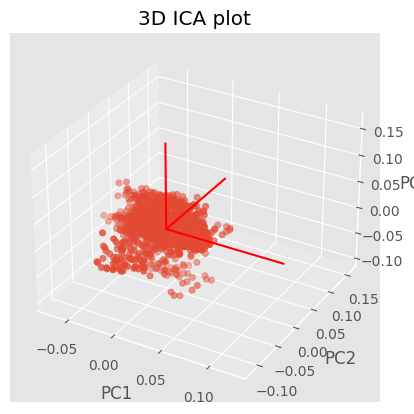

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xax = icaData["component1"]
Yax = icaData["component2"]
Zax = icaData["component3"]

ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

ax.scatter(Xax, Yax, Zax)

origin = [0, 0, 0]  # Origin of the axes
axes_lengths = [max(Xax) - min(Xax), max(Yax) - min(Yax), max(Zax) - min(Zax)]  # Lengths of the axes
ax.plot([origin[0], origin[0] + axes_lengths[0]], [origin[1], origin[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1] + axes_lengths[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1]], [origin[2], origin[2] + axes_lengths[2]], 'r')

plt.title("3D ICA plot")
plt.show()